**Importing the necessary libraries**

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras.utils import to_categorical 
from keras import backend as K
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Activation

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['american_sign_language.PNG', 'sign_mnist_test.csv', 'amer_sign3.png', 'amer_sign2.png', 'sign_mnist_train.csv']


**Data loading**


Load the data from the csv file which contains label information at 0th column and remaining columns shows the pixel value at each 784 locations.

In [81]:
df = pd.read_csv('../input/sign_mnist_train.csv')
print(df.shape)
df.head()


(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


From the dataframe obtain the training data and load the labels. Use to_categorical to convert the labels into one-hot encoding.

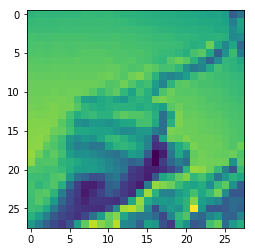

In [82]:
train=df.values[0:,1:]
labels = df.values[0:,0]
labels = to_categorical(labels)
sample = train[1]
plt.imshow(sample.reshape((28,28)))

**Preparing Train/Test set**

Normalize the data and convert each row of (1,784) shape into (28,28,1) of the training data.

(27455, 784) (27455, 25)
(27455, 28, 28, 1) (27455, 25)


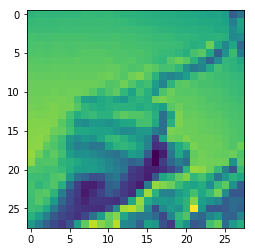

In [83]:
print(train.shape,labels.shape)
#normalizing the dataset
train=train/255
train=train.reshape((27455,28,28,1))
plt.imshow(train[1].reshape((28,28)))
print(train.shape,labels.shape)

**Neural Network model**


We make use of Convolutional Neural Network(CNN) as our model. Initial layer requires the input shape for each row of our training data which is of the shape (28,28,1) and final layer outputs a 25 dimension output.

In [84]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
h=model.fit(train, labels, validation_split=0.3, epochs=6,batch_size=64)

Train on 19218 samples, validate on 8237 samples
Epoch 1/6
19218/19218 [==============================] - 3s 181us/step - loss: 1.4930 - acc: 0.5444 - val_loss: 0.3404 - val_acc: 0.8944
Epoch 2/6
19218/19218 [==============================] - 3s 138us/step - loss: 0.1532 - acc: 0.9521 - val_loss: 0.0704 - val_acc: 0.9792
Epoch 3/6
19218/19218 [==============================] - 3s 138us/step - loss: 0.0255 - acc: 0.9953 - val_loss: 0.0074 - val_acc: 0.9998
Epoch 4/6
19218/19218 [==============================] - 3s 140us/step - loss: 0.0141 - acc: 0.9973 - val_loss: 0.0055 - val_acc: 0.9999
Epoch 5/6
19218/19218 [==============================] - 3s 139us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 6/6
19218/19218 [==============================] - 3s 142us/step - loss: 6.6068e-04 - acc: 1.0000 - val_loss: 6.3395e-04 - val_acc: 1.0000


Plotting the model accuracy and model loss function values.

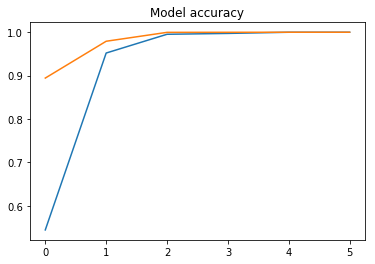

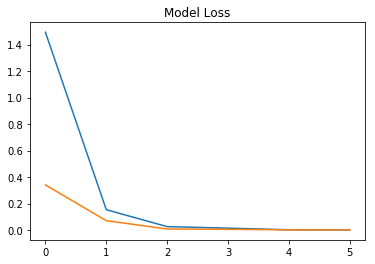

In [85]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.show()


**Testing**

For testing we first take a sample from the traning data which in our case is from 4th location which has a label 13 and then need to prepare the data to make it suitable for our model to predict.

23


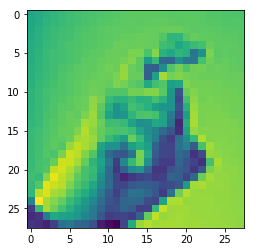

In [92]:
LOC = 25
sample = train[LOC]
plt.imshow(sample.reshape((28,28)))
lbl=labels[LOC]
print(list(lbl).index(1))

Convert the given image to (1,28,28,1) shape ,normalize it and give it to the model. Find the index of the largest probablitiy from the given set of predictions.

In [93]:
sample=sample.reshape((1,28,28,1))
res=model.predict(sample)
res=list(res[0])
mx=max(res)
print(res.index(mx))

23
